# Are referees bias towards the home team in the Premier League?

# Dataset information 

Data taken from [https://www.football-data.co.uk](https://www.football-data.co.uk)

Key to results data:  

- Div = League Division
- Date = Match Date (dd/mm/yy)
- Time = Time of match kick off
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)  

<u> **Match Statistics (where available)** </u>  
- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards
- HBP = Home Team Bookings Points (10 = yellow, 25 = red)
- ABP = Away Team Bookings Points (10 = yellow, 25 = red)

*Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available.*

*Note also that English and Scottish yellow cards do not include the initial yellow card when a second is shown to a player converting it into a red, but this is included as a yellow (plus red) for European games.*


In [136]:
# Importing packages ------------------------------------------------------

import pandas as pd
import numpy as np 
import os 
from plotnine import *
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


# Reading in data ------------------------------------------------------

years = np.arange(5,23) 
years_1 = np.arange(6,24)

## Convert to string and add trailing 0 
## required for website url data is stored on 

years = years.astype(str)
years = np.char.zfill(years, 2)

years_1 = years_1.astype(str)
years_1 = np.char.zfill(years_1, 2)

## Combining to give out the final years
url_years = np.core.defchararray.add(years, years_1)

data_url_base = 'https://www.football-data.co.uk/mmz4281/{Year}/E0.csv'


## Check if the data already exists locally (previously compiled incase of no internet)

if os.path.exists("football_data.csv"):
    df = pd.read_csv("football_data.csv", low_memory=False, index_col=False)
else:
    ## creating url list with all years needed
    ## Also adding delimiter '/' between seasons for new column 
    data_urls_list = []
    season = []
    for year in url_years:
        url_with_year = data_url_base.replace('{Year}', year)
        season_year = year[:2] + '/' + year[2:]
        season.append(season_year)
        data_urls_list.append(url_with_year)

    df_list =[] 

    for file in enumerate(data_urls_list):
        df = pd.read_csv(file[1])
        df['Season'] = season[file[0]]
        df_list.append(df)
    
    df = pd.concat(df_list, ignore_index=True)

cols_to_keep = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Season']

df = df[cols_to_keep]

df['Total_Yellow_Cards'] = df['HY'] + df['AY']
df['Total_Red_Cards'] = df['HR'] + df['AR']
df['Total_Cards'] = df['Total_Yellow_Cards'] + df['Total_Red_Cards']
df['Total_Home_Cards'] = df['HY'] + df['HR']
df['Total_Away_Cards'] = df['AY'] + df['AR']

## Removing latest season as season not finished 
df = df[df.Season != "22/23"]

df.dropna(inplace=True)
df.isna().sum()

Date                  0
HomeTeam              0
AwayTeam              0
FTHG                  0
FTAG                  0
FTR                   0
HTHG                  0
HTAG                  0
HTR                   0
Referee               0
HS                    0
AS                    0
HST                   0
AST                   0
HF                    0
AF                    0
HC                    0
AC                    0
HY                    0
AY                    0
HR                    0
AR                    0
Season                0
Total_Yellow_Cards    0
Total_Red_Cards       0
Total_Cards           0
Total_Home_Cards      0
Total_Away_Cards      0
dtype: int64

## Data 

In [9]:
# Display dataframe 
display(df)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,Season,Total_Yellow_Cards,Total_Red_Cards
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,...,16.0,7.0,8.0,0.0,2.0,0.0,0.0,05/06,2.0,0.0
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,...,14.0,8.0,6.0,3.0,1.0,0.0,0.0,05/06,4.0,0.0
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,...,13.0,6.0,6.0,1.0,2.0,0.0,0.0,05/06,3.0,0.0
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,...,11.0,3.0,6.0,2.0,3.0,0.0,0.0,05/06,5.0,0.0
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,...,11.0,5.0,0.0,2.0,3.0,1.0,0.0,05/06,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476,13/08/2022,Wolves,Fulham,0.0,0.0,D,0.0,0.0,D,J Brooks,...,14.0,5.0,3.0,3.0,3.0,0.0,0.0,22/23,6.0,0.0
6477,13/08/2022,Brentford,Man United,4.0,0.0,H,4.0,0.0,H,S Attwell,...,15.0,8.0,2.0,0.0,4.0,0.0,0.0,22/23,4.0,0.0
6478,14/08/2022,Nott'm Forest,West Ham,1.0,0.0,H,1.0,0.0,H,R Jones,...,11.0,6.0,7.0,4.0,1.0,0.0,0.0,22/23,5.0,0.0
6479,14/08/2022,Chelsea,Tottenham,2.0,2.0,D,1.0,0.0,H,A Taylor,...,9.0,8.0,5.0,3.0,0.0,0.0,0.0,22/23,3.0,0.0


## Variables

Below is a brief explanation of **some** of the variables that will be used to test whether a bias is presentwhen a referee is officating a match.

### Yellow Cards

A yellow card communicates a caution to any player or team official who commits a cautionable offence either on or off the field of play (Association, 2022)[<sup>3</sup>](#fn3).

A player is cautioned if guilty of:  
- delaying the restart of play
- dissent by word or action
- entering, re-entering or deliberately leaving the field of play without the referee's permission
- failing to respect the required distance when play is restarted with a corner kick, free kick or throw-in
- persistent offences (no specific number or pattern of offences constitutes persistent)
- unsporting behaviour
- entering the referee review area (RRA)
- excessively using the review (TV screen) signal
- A substitute or substituted player is cautioned if guilty of:
- delaying the restart of play
- dissent by word or action
- entering or re-entering the field of play without the referee's permission
- unsporting behaviour
- entering the referee review area (RRA)
- excessively using the review (TV screen) signal  

### Red Cards  
The Red card communiates a sending-off in which the player must leave the vicinity of the field of play and the technical area. They can no longer take part in the match (Association, 2022)[<sup>3</sup>](#fn3).

A player, substitute or substituted player who commits any of the following offences is sent off:  

- denying the opposing team a goal or an obvious goal-scoring opportunity by a handball offence (except a goalkeeper
- within their penalty area)
- denying a goal or an obvious goal-scoring opportunity to an opponent whose overall movement is towards the offender�s - goal by an offence punishable by a free kick (unless as outlined below)
- serious foul play
- biting or spitting at someone
- violent conduct
- using offensive, insulting or abusive language and/or gestures
- receiving a second caution in the same match
- entering the video operation room (VOR)





## Introduction
In this report, we test for, and look to find evidence of, referee bias in favor of home teams in the English Premier League using data for all matches between 2005 and 2022 (current season). A role of the referee is to govern the rules set out by the Football Association (FA) during a football match. 

According to the IFAB Laws of the game 2022-23:  
>Decisions will be made to the best of the referee's ability according to the Laws of the Game and the 'spirit of the game' and will be based on the opinion of the referee who has the discretion to take appropriate action within the framework of the Laws of the Game.(Association, 2022)[<sup>1</sup>](#fn1)

There will always be a concern of the referees exercising impartial or bias decisions in favour of a team specifically the home team. In this situation, there are issues of moral hazard and conflicts of interest where I explore whether the the number of sanctions (Yellow cards, Red cards, free kicks and penalties etc) awarded by referees are subject to some bias whether the team playing is at home and behaviour of the referee is somewhat influenced by various other factors. 

Often these split decisions that can decide games taken by referees can often have huge financial implications for teams. For example, if a decision cost a team the game which meant they miss out of qualifying for the UEFA Champions League this could mean the difference between extra revenue for the club as well as attracting top talent for the season ahead. It can also have implications for the manager who may find himself out of a job especially if this forms part of their contract.

These decisions that affect the overall match result provide fuel for debate between players, teams, pundits, journalists and your average fan, in some cases for years into the foreseeable future.  

This concern is nothing new football fans across the global in multiple leagues since time can remember have complained about refereeing decisions. Some recent articles are linked below for reference. There are several fans who even claim conspiracies against their clubs by certain referees and managers have openly expressed dismay when particular match officials are appointed to officiate their matches.  

[https://www.newcastleworld.com/sport/football/newcastle-united/i-hate-sunderland-premier-league-referee-on-bias-and-love-for-newcastle-united-3812928](https://www.newcastleworld.com/sport/football/newcastle-united/i-hate-sunderland-premier-league-referee-on-bias-and-love-for-newcastle-united-3812928)  
[https://www.football365.com/news/mailbox-arsenal-var-referee-conspiracy-man-utd-elon-musk-lionesses](https://www.football365.com/news/mailbox-arsenal-var-referee-conspiracy-man-utd-elon-musk-lionesses)  
[https://www.thesportsman.com/articles/tuchel-s-fury-and-87k-petitions-but-referees-are-not-biased-against-your-team](https://www.thesportsman.com/articles/tuchel-s-fury-and-87k-petitions-but-referees-are-not-biased-against-your-team)  
[https://www.caughtoffside.com/2022/08/16/anthony-taylor-to-continue-to-referee-chelsea-games/](https://www.caughtoffside.com/2022/08/16/anthony-taylor-to-continue-to-referee-chelsea-games/)  
[https://www.football365.com/news/mailbox-liverpool-1-1-palace-darwin-nunez-man-utd-arsenal](https://www.football365.com/news/mailbox-liverpool-1-1-palace-darwin-nunez-man-utd-arsenal)  


This bias however is not just limited to football it can be observed in all sporting competitions. There are numerous studies on this and have been explored for example in hockey (Pappas, 2011)[<sup>2</sup>](#fn2) and in basketball for the well known National Basketball Assocation (NBA) competition (Lim and Rodenberg, 2022)[<sup>3</sup>](#fn3)

In [132]:
# Dataset summary
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Total_Yellow_Cards,Total_Red_Cards
count,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000
mean,1.525232,1.168266,0.683127,0.513313,13.739938,10.975697,5.971981,4.738390,10.977554,11.372446,6.003406,4.787771,1.462074,1.760372,0.059907,0.086223,3.222446,0.146130
std,1.308971,1.157920,0.835277,0.731679,5.412867,4.717523,3.367787,2.824973,3.621377,3.771412,3.117504,2.745714,1.198111,1.274098,0.246297,0.291537,1.893566,0.389928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,26.000000,20.000000,19.000000,7.000000,9.000000,2.000000,2.000000,12.000000,3.000000


# Hypothesis 

The null hypothesis $H_{0}$ is that there is not referee bias towards home teams in Premier League football matches.  
The alternative hypothesis $H_{1}$ is there the referee is bias towards the home team in Premier League football matches.


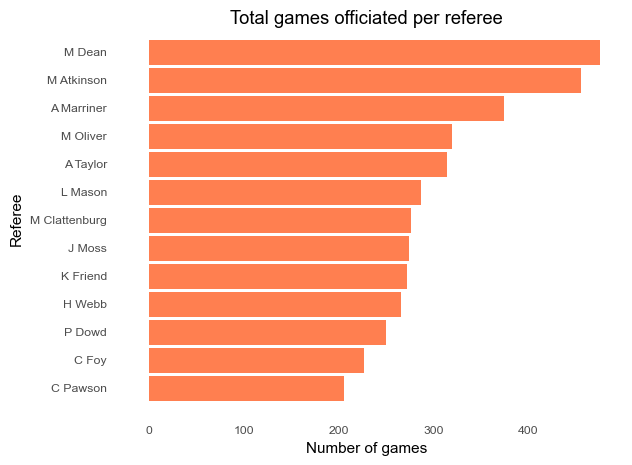

In [134]:
## Plotting the number of game a referee has taken charge of top 13
games_per_ref = df['Referee'].value_counts().rename_axis('Referee').reset_index(name='Count')

(ggplot(data=games_per_ref.head(n=13), 
            mapping=aes(x='reorder(Referee, Count)', y='Count'))+ 
            geom_col(fill='coral') + 
            coord_flip() + 
            theme_minimal(base_family='Arial') + 
            theme(panel_grid_major=element_blank(), 
                  panel_grid_minor=element_blank()) + 
            ylab('Number of games') + 
            ggtitle("Total games officiated per referee") +
            xlab('Referee')).draw();





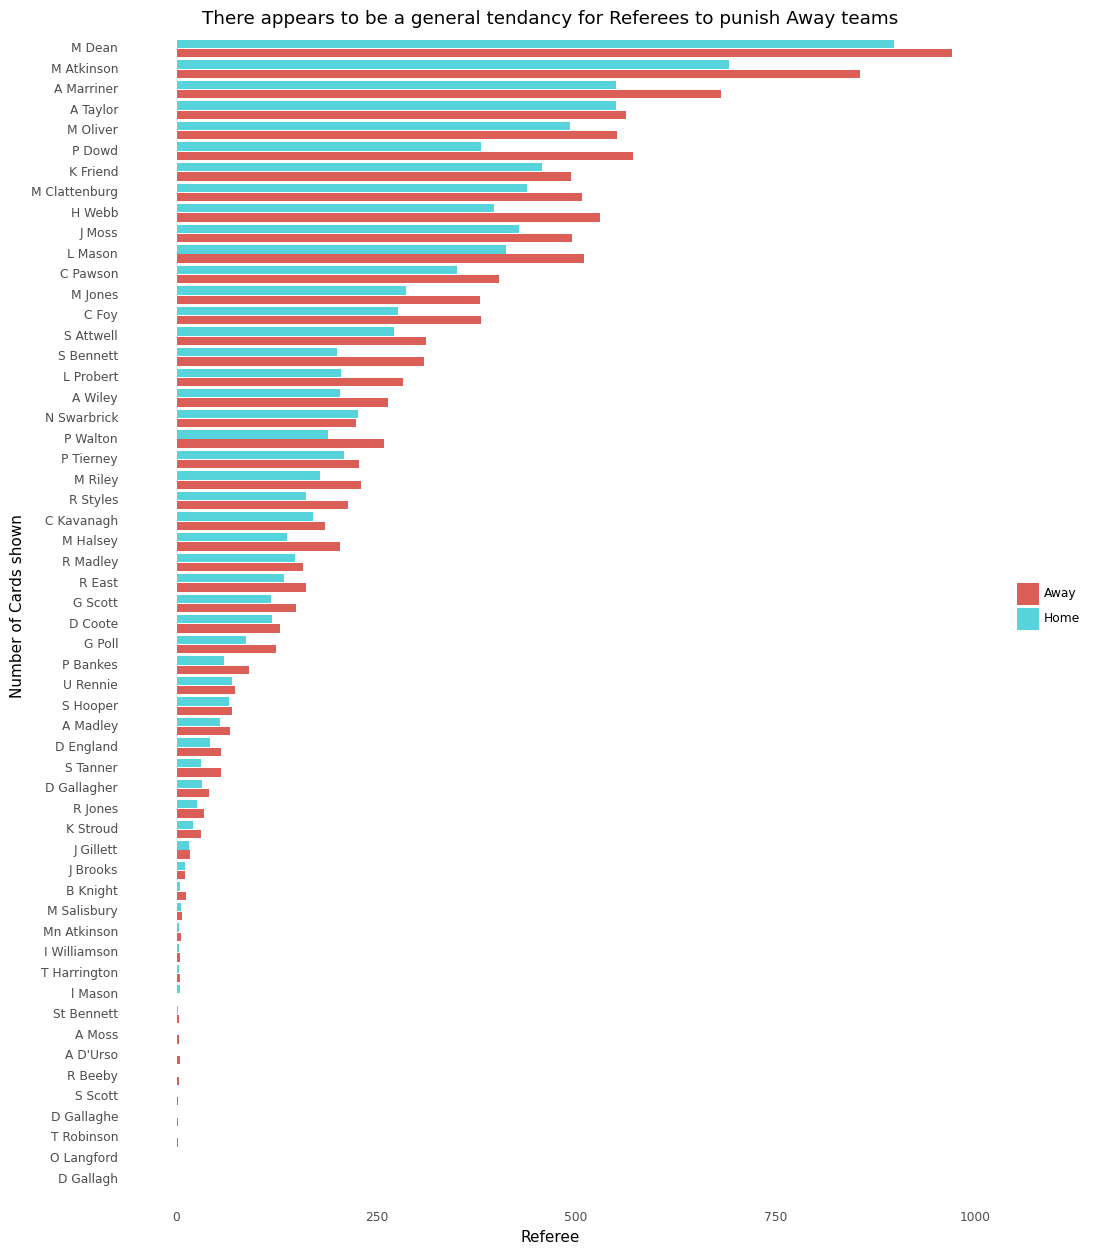

In [175]:
## Cards per ref 

cards_by_ref = df.groupby('Referee').agg(
    Home = pd.NamedAgg(column='Total_Home_Cards', aggfunc=sum),
    Away = pd.NamedAgg(column='Total_Away_Cards', aggfunc=sum)
).sort_values(by="Home", ascending=False).reset_index().melt(id_vars='Referee')

(ggplot(data=cards_by_ref,
        mapping=aes(x = 'reorder(Referee, value)', y = 'value', fill = 'variable')) + 
        geom_col(position = position_dodge2()) +
        coord_flip() +
        theme_minimal() +
        ggtitle("There appears to be a general tendancy for Referees to punish Away teams") +
        xlab("Number of Cards shown")+
        ylab("Referee" ) +
        theme(figure_size=(11,15), 
              panel_grid_major=element_blank(),
              legend_title=element_blank(),
              panel_grid_minor=element_blank())).draw();

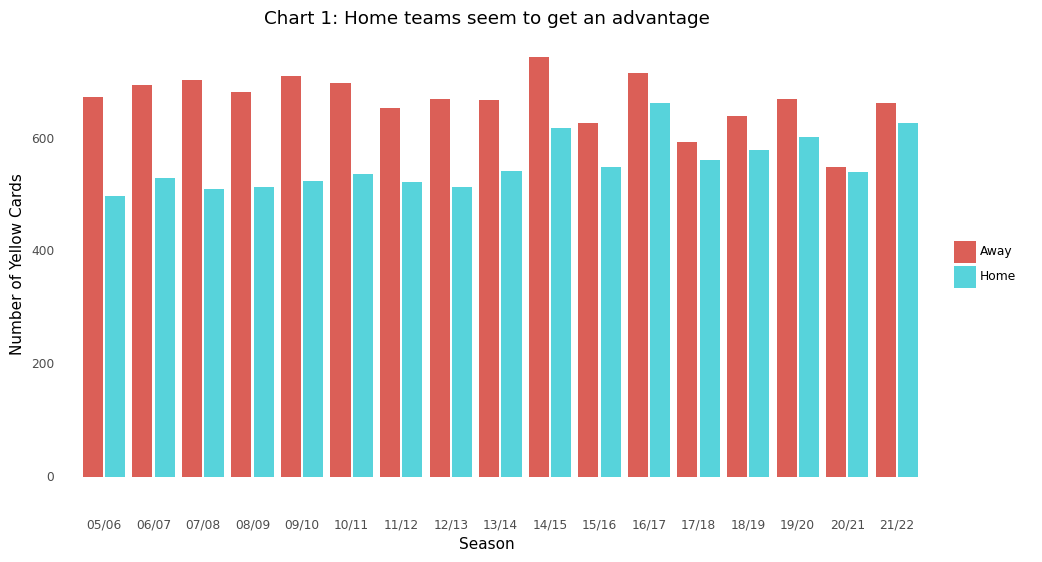

In [133]:
Ycards_by_year = df.groupby('Season').agg(
    Home = pd.NamedAgg(column='HY', aggfunc=sum),
    Away = pd.NamedAgg(column='AY', aggfunc=sum)
   # HR = pd.NamedAgg(column='HR', aggfunc=sum),
    #AR = pd.NamedAgg(column='AR', aggfunc=sum),
).reset_index().melt(id_vars=['Season'], ignore_index=True)

## Plot the Yellow cards per season
(ggplot(data=Ycards_by_year, 
        mapping=aes(x='Season', y='value', fill='variable')) + 
        geom_col(position = position_dodge2()) + 
        theme_minimal() + 
        ylab("Number of Yellow Cards") + 
        theme(legend_title=element_blank(), 
              legend_position='right', 
              figure_size=(11, 6),
              panel_grid_major=element_blank(), 
              panel_grid_minor=element_blank()) + 
        ggtitle("Chart 1: Home teams seem to get an advantage")).draw();

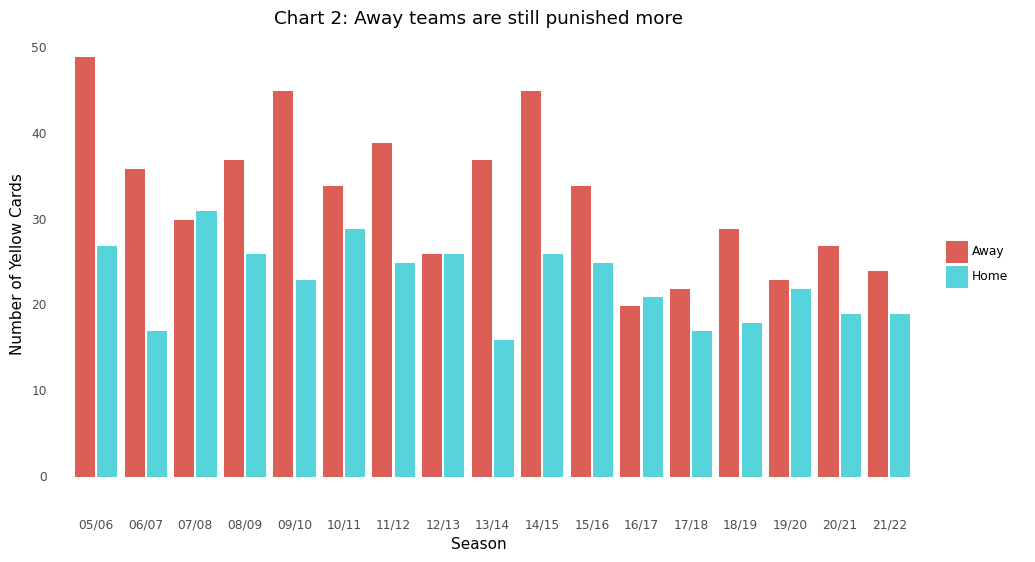

In [131]:
## Plotting Red cards

Rcards_by_year = df.groupby('Season').agg(
    Home = pd.NamedAgg(column='HR', aggfunc=sum),
    Away = pd.NamedAgg(column='AR', aggfunc=sum)
).reset_index().melt(id_vars=['Season'], ignore_index=True)

## Plot the Yellow cards per season
(ggplot(data=Rcards_by_year, 
        mapping=aes(x='Season', y='value', fill='variable')) + 
        geom_col(position = position_dodge2()) + 
        theme_minimal() + 
        ylab("Number of Yellow Cards") + 
        theme(legend_title=element_blank(), 
              legend_position='right', 
              figure_size=(11, 6),
              panel_grid_major=element_blank(), 
              panel_grid_minor=element_blank()) + 
        ggtitle("Chart 2: Away teams are still punished more")).draw();

In [124]:
##aggregate across all years 

totalcards = df.groupby('HomeTeam').agg(
    Home = pd.NamedAgg(column='HY', aggfunc=sum),
    Away = pd.NamedAgg(column='AY', aggfunc=sum)
).reset_index()
totalcards['Gap'] = totalcards['Home'] - totalcards['Away']
totalcards.head()

,HomeTeam,Home,Away,Gap
0,Arsenal,463.0,646.0,-183.0
1,Aston Villa,401.0,479.0,-78.0
2,Birmingham,113.0,125.0,-12.0
3,Blackburn,226.0,246.0,-20.0
4,Blackpool,22.0,26.0,-4.0


# References
<span id="fn1"> 1: Association, T., 2022. Law 5 - The Referee. [online] www.thefa.com. Available at: <https://www.thefa.com/football-rules-governance/lawsandrules/laws/football-11-11/law-5---the-referee> [Accessed 20 August 2022].</span>  

<span id="fn2"> 2: Pappas, C., 2011. Theoretical analysis of referee bias in youth hockey. [online] Digscholarship.unco.edu. Available at: <https://digscholarship.unco.edu/cgi/viewcontent.cgi?article=1069&context=theses> [Accessed 20 August 2022].</span>  

<span id="fn3"> 3: Lim, C. and Rodenberg, R., 2022. Payback Calls: A Starting Point for Measuring Basketball Referee Bias and Impact on Team Performance. [online] Papers.ssrn.com. Available at: <https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1584967> [Accessed 23 August 2022].</span>

<span id="fn4"> 4: Association, F., 2022. Law 12 - Fouls and Misconduct. [online] www.thefa.com. Available at: <https://www.thefa.com/football-rules-governance/lawsandrules/laws/football-11-11/law-12---fouls-and-misconduct> [Accessed 20 August 2022].</span>  
